In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Reduce the dataset to 5,000 images total (2,500 training and 2,500 testing)
n_samples = 2500

# Randomly select 2,500 samples from the training and test sets
indices_train = np.random.choice(x_train.shape[0], n_samples, replace=False)
indices_test = np.random.choice(x_test.shape[0], n_samples, replace=False)

x_train = x_train[indices_train]
y_train = y_train[indices_train]
x_test = x_test[indices_test]
y_test = y_test[indices_test]


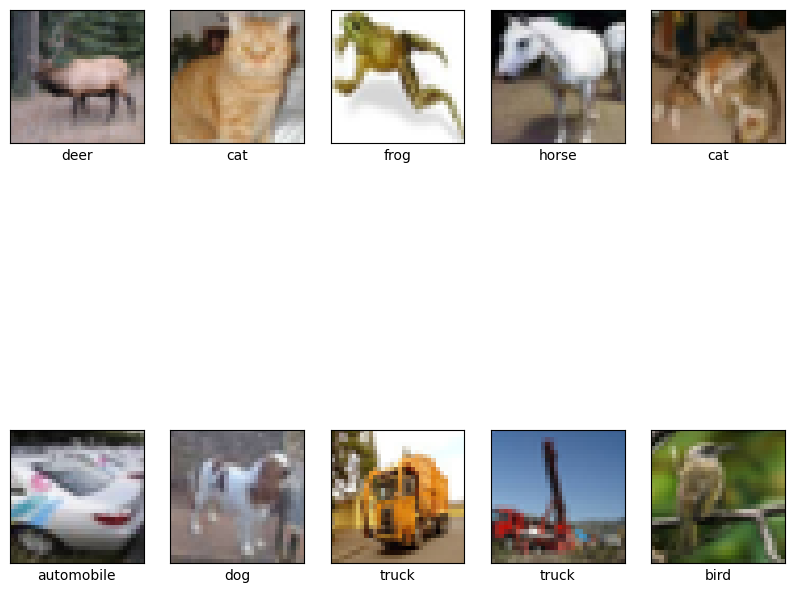

In [4]:
import matplotlib.pyplot as plt

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the first 10 images of the training set
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [5]:
from skimage.color import rgb2gray
import numpy as np

# Convert to grayscale
x_train_gray = np.array([rgb2gray(img) for img in x_train])
x_test_gray = np.array([rgb2gray(img) for img in x_test])

# Flatten the images
x_train_flat = x_train_gray.reshape((x_train_gray.shape[0], -1))
x_test_flat = x_test_gray.reshape((x_test_gray.shape[0], -1))

In [6]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
x_train_flat = scaler.fit_transform(x_train_flat)
x_test_flat = scaler.transform(x_test_flat)

# Train the SVM classifier
clf = svm.SVC()
clf.fit(x_train_flat, y_train.ravel())

SVC()

In [9]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(x_test_flat)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.3216


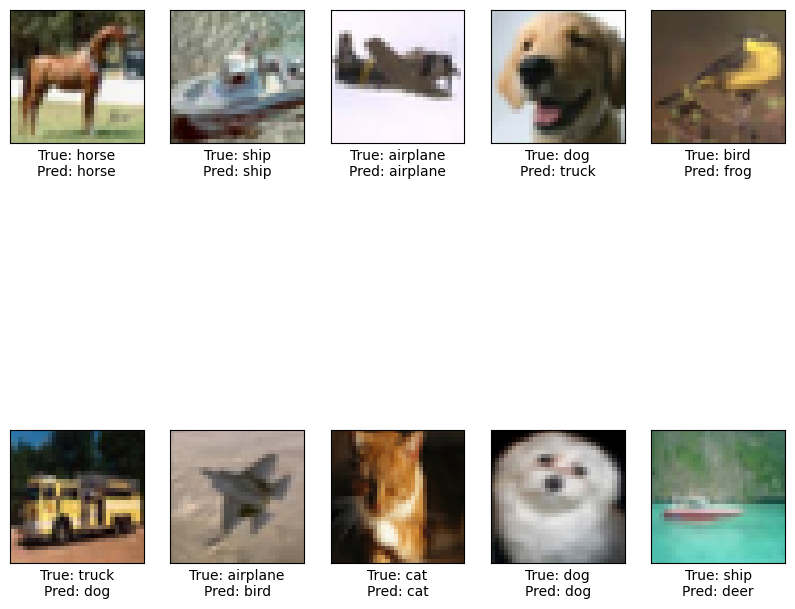

In [10]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(f"True: {class_names[y_test[i][0]]}\nPred: {class_names[y_pred[i]]}")
plt.show()